<a href="https://colab.research.google.com/github/afnanrahman/EAFP/blob/OmerAndKevin/SVM_feature_selection_Wrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Common Packages

In [ ]:
import pandas as pd
import seaborn as sns
sns.reset_orig()
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_smote_data.csv")
data

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,attrition,rate_avg
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,5,1,6891.67
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,7,0,8415.67
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,1,1287.00
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,0,0,8202.33
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,0,5754.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,39,2,1053,1,7,2,2,1160,1,0,72,1,1,0,1,1,14504,4,0,13,3,1,0,12,2,2,1,0,0,1,5209.67
2462,32,0,453,1,11,2,3,998,3,1,43,2,1,4,1,1,10219,0,1,22,4,2,0,4,0,2,3,2,2,1,3571.67
2463,34,2,489,1,7,3,2,1729,3,1,59,2,2,4,1,1,5098,1,0,13,3,2,0,10,4,1,10,4,7,1,1882.00
2464,36,2,237,1,18,3,1,1080,1,0,49,2,1,5,2,1,11643,4,1,11,3,2,0,12,1,2,6,3,2,1,3976.33


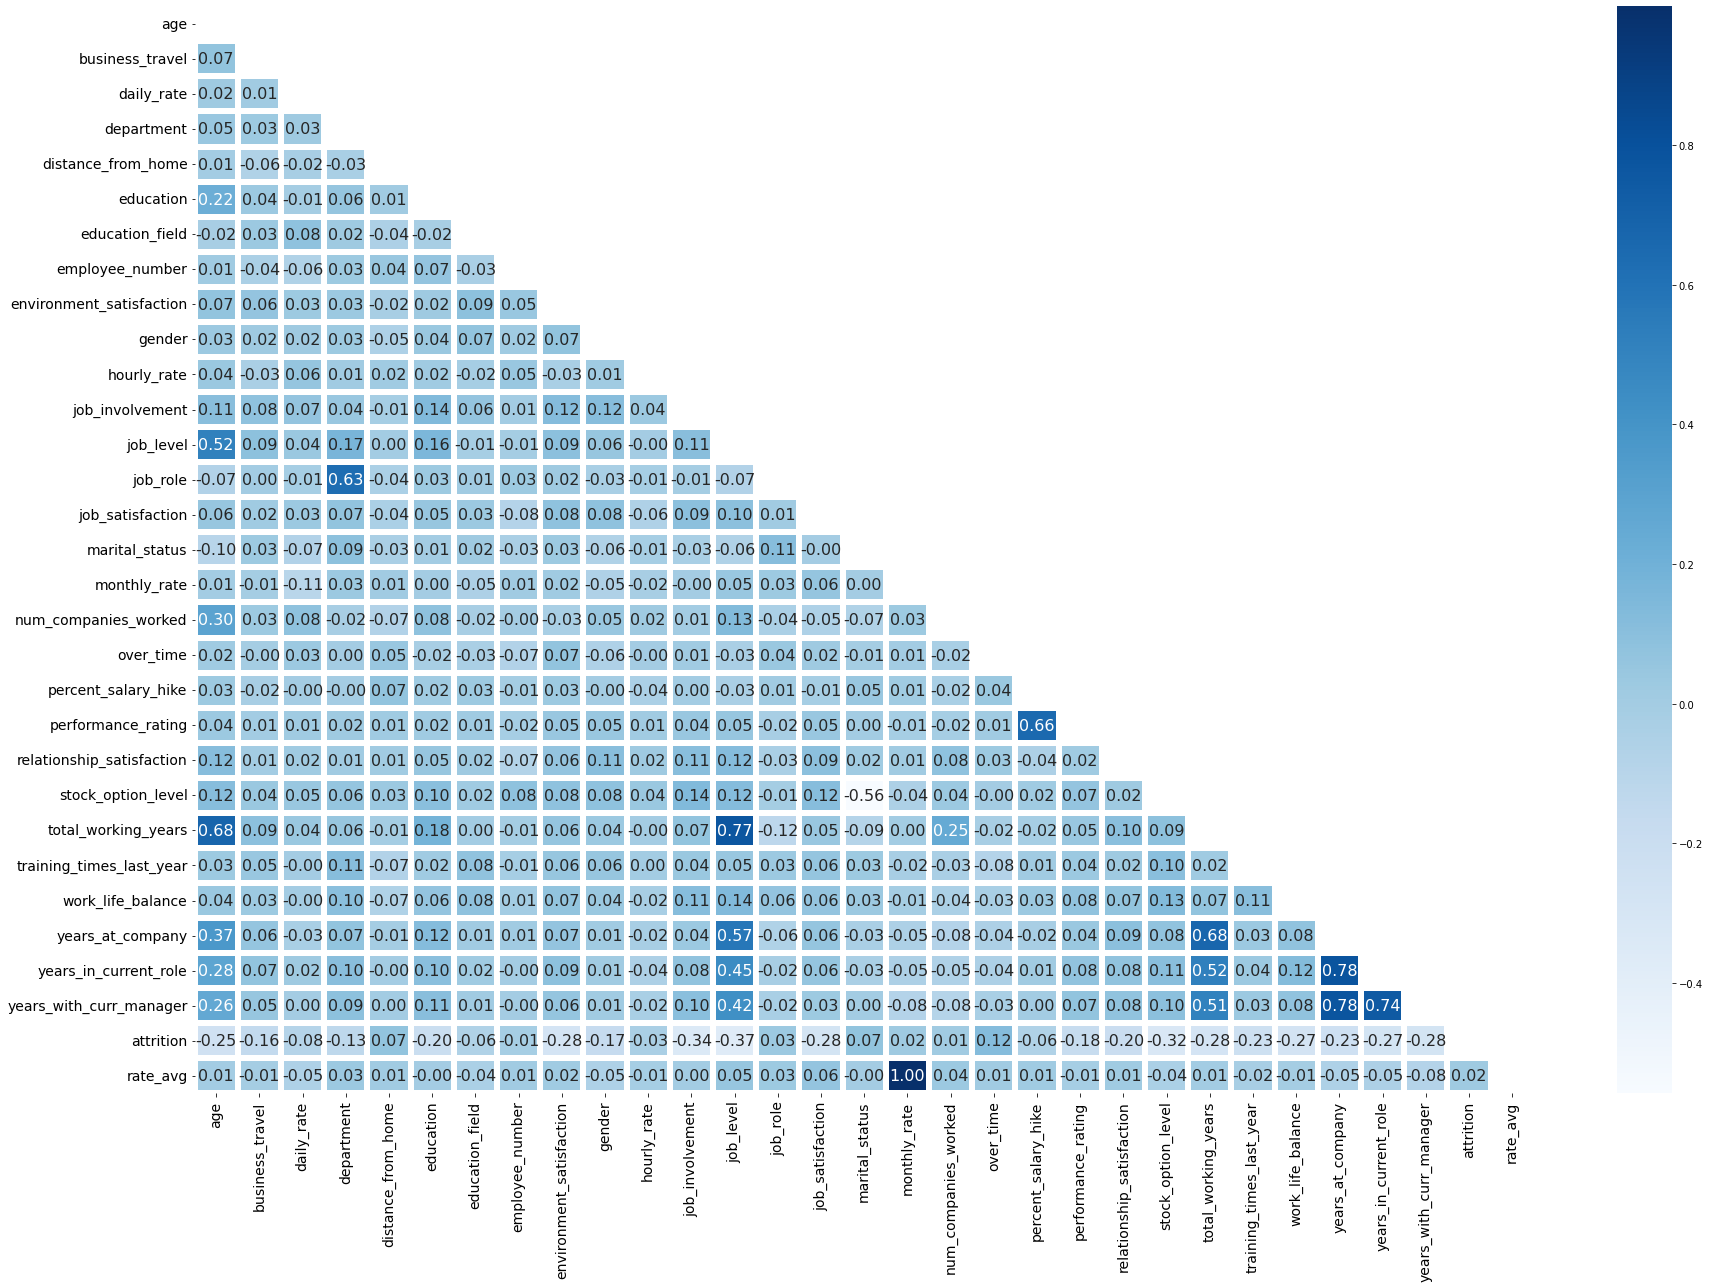

In [ ]:
fig, ax = plt.subplots(figsize=(30, 20))
matrix = np.triu(data.corr(method="pearson"))
sns.heatmap(data.corr(), mask=matrix, annot=True, annot_kws={"size":16}, linewidths=5, fmt=".2f", ax=ax, cmap="Blues")
plt.xticks(size=14, rotation=90)
plt.yticks(size=14, rotation=0)
plt.show()

In [ ]:
all_cols = list(data.columns)
remove_cols = ['total_working_years', 'years_at_company', 'percent_salary_hike',
               'years_with_curr_manager', 'hourly_rate', 'daily_rate', 
               'monthly_rate', "attrition"]

no_corr_cols = [x for x in all_cols if x not in remove_cols]

no_corr_cols

['age',
 'business_travel',
 'department',
 'distance_from_home',
 'education',
 'education_field',
 'employee_number',
 'environment_satisfaction',
 'gender',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'num_companies_worked',
 'over_time',
 'performance_rating',
 'relationship_satisfaction',
 'stock_option_level',
 'training_times_last_year',
 'work_life_balance',
 'years_in_current_role',
 'rate_avg']

# Without Scaling

In [ ]:
X = data[no_corr_cols]
Y = data['attrition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.4837837837837838

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data[no_corr_cols])
data_scale = sc.transform(data[no_corr_cols])

In [ ]:
X = data_scale
Y = data['attrition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)


0.8756756756756757

**Scaled + RBF** gives **87.5 accuracy**

In [ ]:
X = data_scale
Y = data['attrition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, Y_train)
clf_linear.score(X_test, Y_test)

0.8216216216216217

**Scaled + Linear** gives **82.1 accuracy**

# Sequential Forward Selection Wrapper

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
clf_sfs = SVC()
sfs = SequentialFeatureSelector(clf_sfs, n_features_to_select=15, direction="forward", scoring='accuracy')
sfs = sfs.fit(X_train, Y_train)
sfs

SequentialFeatureSelector(estimator=SVC(), n_features_to_select=15,
                          scoring='accuracy')

In [ ]:
sfs.get_feature_names_out(no_corr_cols)

array(['business_travel', 'distance_from_home', 'education',
       'employee_number', 'environment_satisfaction', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'over_time', 'relationship_satisfaction', 'stock_option_level',
       'training_times_last_year', 'work_life_balance'], dtype=object)

In [ ]:
feat_cols = sfs.get_support(indices=True)
print(feat_cols)

[ 1  3  4  6  7  9 10 11 12 13 15 17 18 19 20]


In [ ]:
clf_sfs.fit(X_train[:, feat_cols], Y_train)

y_test_pred = clf_sfs.predict(X_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(Y_test, y_test_pred))

Testing accuracy on selected features: 0.861


**Scaled + RBF + SFS 15** gives **86.1 accuracy**

In [ ]:
scores = {}
for n in range(1,23):
  clf_sfs = SVC()
  sfs = SequentialFeatureSelector(clf_sfs, n_features_to_select=n, direction="forward", scoring='accuracy')
  sfs = sfs.fit(X_train, Y_train)
  feat_cols = sfs.get_support(indices=True)
  clf_sfs.fit(X_train[:, feat_cols], Y_train)
  y_test_pred = clf_sfs.predict(X_test[:, feat_cols])
  scores[n] = accuracy_score(Y_test, y_test_pred)

In [ ]:
for key, value in scores.items():
    print(key, ' : ', value)

1  :  0.6675675675675675
2  :  0.7202702702702702
3  :  0.754054054054054
4  :  0.7905405405405406
5  :  0.8108108108108109
6  :  0.8337837837837838
7  :  0.822972972972973
8  :  0.8378378378378378
9  :  0.845945945945946
10  :  0.8378378378378378
11  :  0.8513513513513513
12  :  0.8567567567567568
13  :  0.8554054054054054
14  :  0.8662162162162163
15  :  0.8608108108108108
16  :  0.8689189189189189
17  :  0.8756756756756757
18  :  0.8864864864864865
19  :  0.8891891891891892
20  :  0.8824324324324324
21  :  0.8837837837837837
22  :  0.8797297297297297


In [ ]:
clf_sfs = SVC()
sfs = SequentialFeatureSelector(clf_sfs, n_features_to_select=19, direction="forward", scoring='accuracy')
sfs = sfs.fit(X_train, Y_train)
sfs.get_feature_names_out(no_corr_cols)

array(['age', 'business_travel', 'distance_from_home', 'education',
       'employee_number', 'environment_satisfaction', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'over_time', 'performance_rating', 'relationship_satisfaction',
       'stock_option_level', 'training_times_last_year',
       'work_life_balance', 'years_in_current_role', 'rate_avg'],
      dtype=object)

In [ ]:
sfs.get_support(indices=True)

array([ 0,  1,  3,  4,  6,  7,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22])

So, having around 18-21 features results in **88% accuracy**, with highest in having 19 features with **88.9% accuracy**
<br>Excluded features: *gender*, *department*, *education_field*, *num_companies_worked*

 

# Sequential Backward Selection Wrapper


In [ ]:
scores = {}
for n in range(15,23):
  clf_sfs = SVC()
  sfs = SequentialFeatureSelector(clf_sfs, n_features_to_select=n, direction="backward", scoring='accuracy')
  sfs = sfs.fit(X_train, Y_train)
  feat_cols = sfs.get_support(indices=True)
  clf_sfs.fit(X_train[:, feat_cols], Y_train)
  y_test_pred = clf_sfs.predict(X_test[:, feat_cols])
  scores[n] = accuracy_score(Y_test, y_test_pred)

In [ ]:
for key, value in scores.items():
    print(key, ' : ', value)

15  :  0.8567567567567568
16  :  0.8594594594594595
17  :  0.8608108108108108
18  :  0.8675675675675676
19  :  0.8729729729729729
20  :  0.8851351351351351
21  :  0.8891891891891892
22  :  0.8810810810810811


In [ ]:
clf_sfs = SVC()
sfs = SequentialFeatureSelector(clf_sfs, n_features_to_select=21, direction="backward", scoring='accuracy')
sfs = sfs.fit(X_train, Y_train)
sfs.get_feature_names_out(no_corr_cols)

array(['age', 'business_travel', 'department', 'distance_from_home',
       'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status',
       'num_companies_worked', 'over_time', 'relationship_satisfaction',
       'stock_option_level', 'training_times_last_year',
       'work_life_balance', 'years_in_current_role', 'rate_avg'],
      dtype=object)

In [ ]:
sfs.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 20, 21, 22])

So, having around 20-22 features results in **88% accuracy**, with highest in having 21 features with **88.9% accuracy**
<br>Excluded *gender* and *performance_rating*

# Improved Model
Working off of scaled SVC model by removing features **gender** and **performance_rating**. 

In [ ]:
all_cols = list(data.columns)
remove_cols = ['total_working_years', 'years_at_company', 'percent_salary_hike',
               'years_with_curr_manager', 'hourly_rate', 'daily_rate', 
               'monthly_rate', "attrition", "gender", "performance_rating"]

no_corr_cols = [x for x in all_cols if x not in remove_cols]

no_corr_cols

['age',
 'business_travel',
 'department',
 'distance_from_home',
 'education',
 'education_field',
 'employee_number',
 'environment_satisfaction',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'num_companies_worked',
 'over_time',
 'relationship_satisfaction',
 'stock_option_level',
 'training_times_last_year',
 'work_life_balance',
 'years_in_current_role',
 'rate_avg']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data[no_corr_cols])
data_scale = sc.transform(data[no_corr_cols])
X_scale = data_scale
Y_scale = data['attrition']
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_scale, test_size=0.3, random_state=42)
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8891891891891892

Text(0.5, 0, 'Permutation Importance')

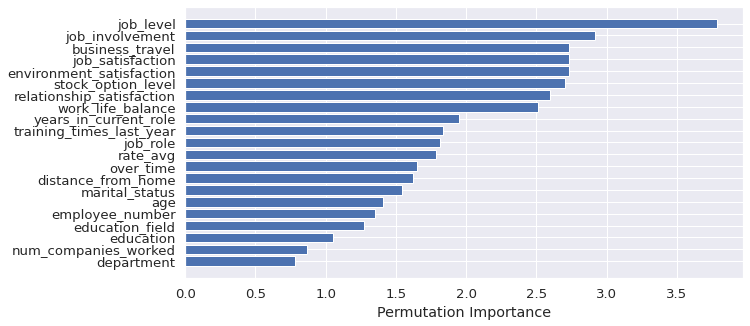

In [ ]:
from sklearn.inspection import permutation_importance
%matplotlib inline
perm_importance = permutation_importance(clf, X_test, Y_test)

features = np.array(no_corr_cols)
sorted_idx = perm_importance.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,5))
plt.barh(features[sorted_idx], (perm_importance.importances_mean[sorted_idx])*100)
plt.xlabel("Permutation Importance")

[Permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html) is a tool for non-linear based models defined as the *decrease in the model's score* if the feature was not included in the set. So, removing **job_level** would reduce out model's accuracy by around 4%

# Model Metrics

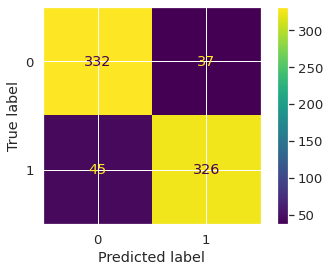

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
X = pd.DataFrame(X_scale)
Y = pd.DataFrame(Y_scale)
Y = np.ravel(Y)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
clf = SVC()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

clf_accuracies = []
clf_precisions = []
clf_recall = []
clf_f1_score = []


for train_index, test_index in kfold.split(X):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      y_train, y_test = Y[train_index], Y[test_index]
      clf.fit(X_train, y_train)
      y_pred_clf = clf.predict(X_test)

      # evaluate predictions
      accuracy_clf = round(accuracy_score(y_test, y_pred_clf), 4) 
      clf_accuracies.append(round(accuracy_clf, 4))

      precision = precision_score(y_test, y_pred_clf)
      clf_precisions.append(round(precision,4))

      recall = recall_score(y_test, y_pred_clf)
      clf_recall.append(round(recall,4))

      f1 = f1_score(y_test, y_pred_clf)
      clf_f1_score.append(round(f1,4))

      
print("Accuracies:" , clf_accuracies )
print("Precisions:" , clf_precisions)
print("Recalls:", clf_recall)
print("f1_scores:" , clf_f1_score)

Accuracies: [0.8765, 0.8864, 0.8945, 0.8925, 0.8682]
Precisions: [0.8861, 0.8879, 0.9212, 0.8828, 0.9087]
Recalls: [0.8607, 0.8729, 0.8706, 0.8941, 0.8359]
f1_scores: [0.8732, 0.8803, 0.8952, 0.8884, 0.8708]


In [ ]:
print("Accuracy: %.2f%%" % (np.mean(clf_accuracies)*100))
print("Precisions: %.2f%%" % (np.mean(clf_precisions)*100))
print("Recall: %.2f%%" % (np.mean(clf_recall)*100))
print("f1_score: %.2f%%" % (np.mean(clf_f1_score)*100))

Accuracy: 88.36%
Precisions: 89.73%
Recall: 86.68%
f1_score: 88.16%


AUC - Test Set: 87.03%


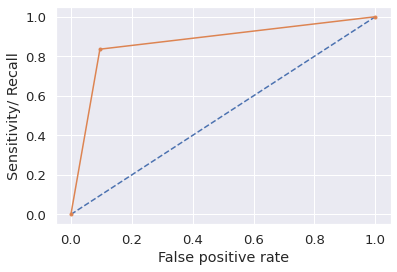

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred_clf)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_clf)

plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

# Hyperparamater Tuning 

2 parameters of interest are **C** and **Gamma**<br>
*   **C** is a regularizer for the error term, tradeoff between smooth boundaries and classifying all training points correctly.
*   **Gamma** is a parameter for non-linear kernals, like in our case, to determing the radius of the decision boundary around the clusters (groups).<br>
In both cases, the **higher** they are, the more likely they lead to **overfitting**



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C": [0.01, 0.1, 1, 10, 100],
              "gamma": [0.01, 0.1, 1, 10, 100]}
grid_cv = GridSearchCV(SVC(), param_grid, verbose=2)
grid_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .................................C=0.01, gamma=0.01; total time=   0.2s
[CV] END .................................C=0.01, gamma=0.01; total time=   0.2s
[CV] END .................................C=0.01, gamma=0.01; total time=   0.2s
[CV] END .................................C=0.01, gamma=0.01; total time=   0.2s
[CV] END .................................C=0.01, gamma=0.01; total time=   0.2s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.2s
[CV] END ....................................C=0.01, gamma=1; total time=   0.2s
[CV] END ....................................C=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             verbose=2)

In [ ]:
print(grid_cv.best_estimator_)

SVC(C=10, gamma=0.1)


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       369
           1       0.93      0.89      0.91       371

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740



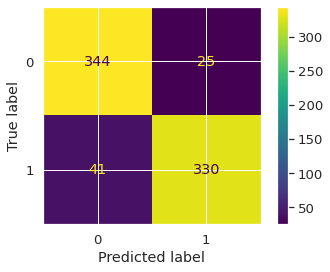

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
grid_pred = grid_cv.predict(X_test)
cm = confusion_matrix(Y_test, grid_pred, labels=grid_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_cv.classes_)
disp.plot()

print(classification_report(Y_test, grid_pred))

So, it turns out setting **C = 10** and **gamma = 0.1** gives us the best Support Vector Classifier of Attrition, with an accuracy of **91%**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"C": [x for x in range(11, 100, 10)],
              "gamma": [x/10 for x in range(1, 11)]}
rand_cv = RandomizedSearchCV(SVC(), param_grid, verbose=2)
rand_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................................C=31, gamma=1.0; total time=   0.2s
[CV] END ....................................C=31, gamma=1.0; total time=   0.2s
[CV] END ....................................C=31, gamma=1.0; total time=   0.2s
[CV] END ....................................C=31, gamma=1.0; total time=   0.2s
[CV] END ....................................C=31, gamma=1.0; total time=   0.2s
[CV] END ....................................C=51, gamma=0.4; total time=   0.2s
[CV] END ....................................C=51, gamma=0.4; total time=   0.2s
[CV] END ....................................C=51, gamma=0.4; total time=   0.2s
[CV] END ....................................C=51, gamma=0.4; total time=   0.2s
[CV] END ....................................C=51, gamma=0.4; total time=   0.2s
[CV] END ....................................C=21, gamma=0.1; total time=   0.2s
[CV] END ....................................C=2

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [11, 21, 31, 41, 51, 61, 71, 81,
                                              91],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9, 1.0]},
                   verbose=2)

In [ ]:
print(rand_cv.best_estimator_)

SVC(C=21, gamma=0.1)


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       369
           1       0.93      0.89      0.91       371

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740



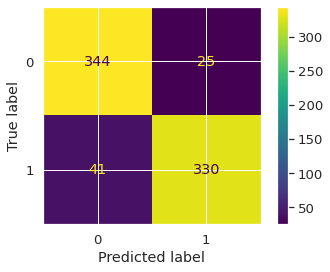

In [28]:
rand_pred = rand_cv.predict(X_test)
print(classification_report(Y_test, rand_pred))
cm_rand = confusion_matrix(Y_test, rand_pred)
disp_rand_cm = ConfusionMatrixDisplay(confusion_matrix=cm_rand)
disp_rand_cm.plot()

So, it turns out using randomized search over the range of optimal values from *GridSearchCV* does not give us a better accuracy than **91%**. Grid Search is more than enough for us.